# Terceira Avaliação de Física Computacional I

* Aluno : Gabriel Wendell Celestino Rocha
* Matrícula :  20190112149 

* Disciplina : Física Computacional I
* Professor : Leonardo Machado
* Data de Entrega : 18/12/2020

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook

## Problema 5

### Letra a)

Seja $\overrightarrow{r_{i}}$ com $i=1,2,3$ as posições de cada corpo com relação ao centro de massa do sistema. Pela lei da gravitação de Newton, temos que

$$\overrightarrow{F}=G\frac{Mm}{r^{3}}\overrightarrow{r}$$

Analisando as forças atuantes no corpo 1, podemos escrever a seguinte relação

$$\overrightarrow{F}_{1/2}+\overrightarrow{F}_{1/3}=Gm_{1}\Bigg(\frac{m_{2}}{r_{1/2}^{3}}\overrightarrow{r}_{1/2}+\frac{m_{3}}{r_{1/3}^{3}}\overrightarrow{r}_{1/3}\Bigg)$$

Pela terceira lei de Newton, a ordem dos índices independe dos módulos, ou seja, $\overrightarrow{r}_{i/j}=\overrightarrow{r}_{j}-\overrightarrow{r}_{i}$ com $i\neq j$ onde $i,j=1,2,3$ tal que o módulo de tais quantidades permanecem as mesmas em referenciais galileanos. Dessa forma, podemos escrever

$$\overrightarrow{F}=m\frac{d^{2}\overrightarrow{r}}{dt^{2}}\implies m_{1}\frac{d^{2}\overrightarrow{r}_{1}}{dt^{2}}=Gm_{1}\Bigg(\frac{m_{2}}{r_{1/2}^{3}}\overrightarrow{r}_{1/2}+\frac{m_{3}}{r_{1/3}^{3}}\overrightarrow{r}_{1/3}\Bigg)\text{ }\text{ }\therefore$$

$$\therefore\text{ }\text{ }\boxed{\frac{d^{2}\overrightarrow{r}_{1}}{dt^{2}}=Gm_{2}\frac{\overrightarrow{r}_{2}-\overrightarrow{r}_{1}}{|\overrightarrow{r}_{2}-\overrightarrow{r}_{1}|^{3}}+Gm_{3}\frac{\overrightarrow{r}_{3}-\overrightarrow{r}_{1}}{|\overrightarrow{r}_{3}-\overrightarrow{r}_{1}|^{3}}}$$

Analogamente, podemos escrever as forças que atuam nos outros corpos da seguinte forma

$$\overrightarrow{F}_{2/1}+\overrightarrow{F}_{2/3}=m_{2}\Bigg(Gm_{1}\frac{\overrightarrow{r}_{1}-\overrightarrow{r}_{2}}{|\overrightarrow{r}_{1}-\overrightarrow{r}_{2}|^{3}}+Gm_{3}\frac{\overrightarrow{r}_{3}-\overrightarrow{r}_{2}}{|\overrightarrow{r}_{3}-\overrightarrow{r}_{2}|^{3}}\Bigg)$$

$$\overrightarrow{F}_{3/1}+\overrightarrow{F}_{3/3}=m_{3}\Bigg(Gm_{1}\frac{\overrightarrow{r}_{1}-\overrightarrow{r}_{3}}{|\overrightarrow{r}_{1}-\overrightarrow{r}_{3}|^{3}}+Gm_{2}\frac{\overrightarrow{r}_{2}-\overrightarrow{r}_{3}}{|\overrightarrow{r}_{2}-\overrightarrow{r}_{3}|^{3}}\Bigg)$$

O que nos permite concluir corretamente que

$$\therefore\text{ }\text{ }\boxed{\frac{d^{2}\overrightarrow{r}_{2}}{dt^{2}}=Gm_{1}\frac{\overrightarrow{r}_{1}-\overrightarrow{r}_{2}}{|\overrightarrow{r}_{1}-\overrightarrow{r}_{2}|^{3}}+Gm_{3}\frac{\overrightarrow{r}_{3}-\overrightarrow{r}_{2}}{|\overrightarrow{r}_{3}-\overrightarrow{r}_{2}|^{3}}}$$

$$\therefore\text{ }\text{ }\boxed{\frac{d^{2}\overrightarrow{r}_{3}}{dt^{2}}=Gm_{1}\frac{\overrightarrow{r}_{1}-\overrightarrow{r}_{3}}{|\overrightarrow{r}_{1}-\overrightarrow{r}_{3}|^{3}}+Gm_{2}\frac{\overrightarrow{r}_{2}-\overrightarrow{r}_{3}}{|\overrightarrow{r}_{2}-\overrightarrow{r}_{3}|^{3}}}$$

Considere agora as transformações $\frac{d\overrightarrow{r}_{i}}{dt}\equiv\overrightarrow{\omega}_{i}$ com $i,j,k=1,2,3$. Com base nessas transformações, podemos escrever

$$\therefore\text{ }\text{ }\boxed{\frac{d\overrightarrow{\omega}_{i}}{dt}=Gm_{j}\frac{\overrightarrow{r}_{j}-\overrightarrow{r}_{i}}{|\overrightarrow{r}_{j}-\overrightarrow{r}_{i}|^{3}}+Gm_{k}\frac{\overrightarrow{r}_{k}-\overrightarrow{r}_{i}}{|\overrightarrow{r}_{k}-\overrightarrow{r}_{i}|^{3}}}$$

### Letra b)

Desejamos plotar a trilha de três estrelas de massas $m_{1}=150$, $m_{2}=200$ e $m_{3}=250$ no intervalo $t\in[0,2]$ definindo $G=1$. Vamos começar definindo as nossas constantes físicas e temporais:

In [2]:
G = 1
m1 = 150
m2 = 200
m3 = 250

t_0 = 0
t_f = 2

Definimos agora as constantes espaciais:

In [3]:
x1_0 = 3
x2_0 = -1
x3_0 = -1

y1_0 = 1
y2_0 = -2
y3_0 = 1

vx1_0 = 0
vx2_0 = 0
vx3_0 = 0

vy1_0 = 0
vy2_0 = 0
vy3_0 = 0

Definimos agora a nossa função principal `f(r,t)`:

In [4]:
def f(r, t):
    x1 = r[0]
    vx1 = r[1]
    y1 = r[2]
    vy1 = r[3]
    x2 = r[4]
    vx2 = r[5]
    y2 = r[6]
    vy2 = r[7]
    x3 = r[8]
    vx3 = r[9]
    y3 = r[10]
    vy3 = r[11]
    
    r12 = np.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)
    r23 = np.sqrt((x3 - x2) ** 2 + (y3 - y2) ** 2)
    r13 = np.sqrt((x1 - x3) ** 2 + (y1 - y3) ** 2)
    
    return np.array([vx1, G * m2 * (x2 - x1) / r12 ** 3 + G * m3 * (x3 - x1) / r13 ** 3,
                  vy1, G * m2 * (y2 - y1) / r12 ** 3 + G * m3 * (y3 - y1) / r13 ** 3,
                  vx2, G * m1 * (x1 - x2) / r12 ** 3 + G * m3 * (x3 - x2) / r23 ** 3,
                  vy2, G * m1 * (y1 - y2) / r12 ** 3 + G * m3 * (y3 - y2) / r23 ** 3,
                  vx3, G * m1 * (x1 - x3) / r13 ** 3 + G * m2 * (x2 - x3) / r23 ** 3,
                  vy3, G * m1 * (y1 - y3) / r13 ** 3 + G * m2 * (y2 - y3) / r23 ** 3 ], float)

Agora implementamos o método com o tamanho de passo adaptativo:

In [5]:
def time_step(r, t, h):
    def runge_kutta_step(r, t, h):
        '''
        - param r: posições e velocidades atuais
        - param t: valor atual de t
        - param h: tamanho do passo
        
        - return: um vetor da mudança nas posições e velocidades para chegar a t + h
        '''
        k1 = h * f(r, t)
        k2 = h * f(r + 0.5 * k1, t + 0.5 * h)
        k3 = h * f(r + 0.5 * k2, t + 0.5 * h)
        k4 = h * f(r + k3, t + h)
        
        return (k1 + 2 * k2 + 2 * k3 + k4) / 6

    # Realizamos 2 etapas do RK com um passo de tamanho h:
    delta_step_1 = runge_kutta_step(r, t, h)
    delta_step_2 = runge_kutta_step(r + delta_step_1, t + h, h)
    delta_r1 = delta_step_1 + delta_step_2

    # Realizamos 1 etapa do RK com um passo de tamanho 2h:
    delta_r2 = runge_kutta_step(r, t, 2 * h)

    # Computamos as estimativas dos erros:
    
    # Erro para a estrela 1:
    delta_x1_m1 = delta_r1[0]
    delta_y1_m1 = delta_r1[2]
    delta_x2_m1 = delta_r2[0]
    delta_y2_m1 = delta_r2[2]
    error_m1 = np.sqrt((delta_x1_m1 - delta_x2_m1) ** 2 + (delta_y1_m1 - delta_y2_m1) ** 2) / 30

    # Erro para a estrela 2:
    delta_x1_m2 = delta_r1[4]
    delta_y1_m2 = delta_r1[6]
    delta_x2_m2 = delta_r2[4]
    delta_y2_m2 = delta_r2[6]
    error_m2 = np.sqrt((delta_x1_m2 - delta_x2_m2) ** 2 + (delta_y1_m2 - delta_y2_m2) ** 2) / 30

    # Erro para a estrela 3:
    delta_x1_m3 = delta_r1[8]
    delta_y1_m3 = delta_r1[10]
    delta_x2_m3 = delta_r2[8]
    delta_y2_m3 = delta_r2[10]
    error_m3 = np.sqrt((delta_x1_m3 - delta_x2_m3) ** 2 + (delta_y1_m3 - delta_y2_m3) ** 2) / 30

    # Usamos o maior valor entre os erros:
    error = max(error_m1, error_m2, error_m3)
    

    # Calculamos o rho:
    delta = 0.001  # Erro por unidade de tempo
    rho = h * delta / error
    

    # Calcula o fator para multiplicar h por:
    factor = np.power(rho, 1 / 4)
    

    # Atualiza h de acordo
    # Se a precisão desejada for atingida, vá para a próxima etapa
    if  rho >= 1:
        # Atualiza t
        t = t + 2 * h

        # Evita que h fique muito grande
        if factor > 2:
            h *= 1.5
        else:
            h *= factor

        #  Use extrapolação local para melhorar nossa estimativa das posições
        delta_r1[0] += (delta_x1_m1 - delta_x2_m1) / 15
        delta_r1[2] += (delta_y1_m1 - delta_y2_m1) / 15
        delta_r1[4] += (delta_x1_m2 - delta_x2_m2) / 15
        delta_r1[6] += (delta_y1_m2 - delta_y2_m2) / 15
        delta_r1[8] += (delta_x1_m3 - delta_x2_m3) / 15
        delta_r1[10] += (delta_y1_m3 - delta_y2_m3) / 15
        
        return delta_r1, h, t
    
    # Se a precisão da meta não for atingida, deve-se refazer a etapa com h menor
    else:
        return time_step(r, t, factor * h)

Agora definimos o tamanho inicial do passo $h$, alguns arrays vázios para armazenar os valores e as condições iniciais:

In [6]:
h = (t_f - t_0) / 400000 

tpoints = []
xpoints1 = []
ypoints1 = []
xpoints2 = []
ypoints2 = []
xpoints3 = []
ypoints3 = []

r = np.array([x1_0, vx1_0, y1_0, vy1_0, x2_0, vx2_0, y2_0, vy2_0, x3_0, vx3_0, y3_0, vy3_0], float)  

Agora implementamos o nosso laço:

In [7]:
t = t_0

while(t < t_f):
    tpoints.append(t)
    xpoints1.append(r[0])
    ypoints1.append(r[2])
    xpoints2.append(r[4])
    ypoints2.append(r[6])
    xpoints3.append(r[8])
    ypoints3.append(r[10])
    
    delta_r, h, t = time_step(r, t, h)
    r += delta_r

Como de costume, definimos uma função para melhorar a estética dos plots:

In [8]:
def opt_plot():
    plt.grid(True, linestyle=':', color='0.50')
    plt.minorticks_on()
    plt.tick_params(axis='both',which='minor', direction = "in",
                    top = True,right = True, length=5,width=1,labelsize=15)
    plt.tick_params(axis='both',which='major', direction = "in",
                    top = True,right = True, length=8,width=1,labelsize=15)

Por fim, vamos ao plot:

<IPython.core.display.Javascript object>


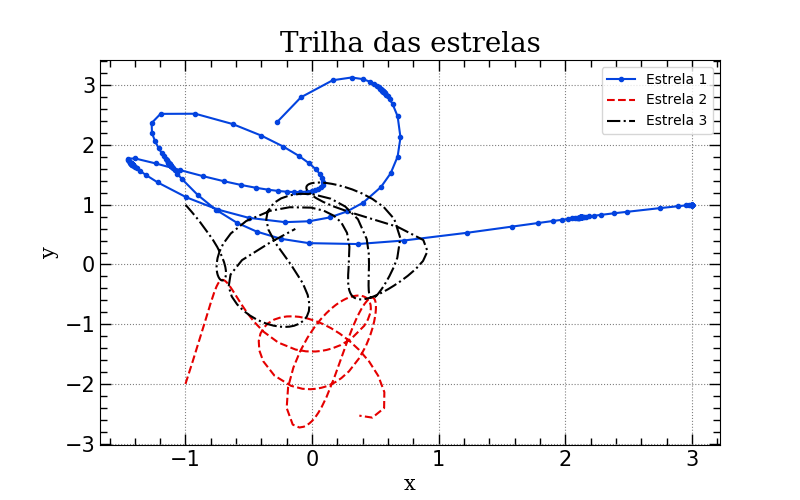

In [9]:
plt.figure(figsize=(8,5))

plt.plot(xpoints1, ypoints1, '.-', color='xkcd:blue', label='Estrela 1')
plt.plot(xpoints2, ypoints2, '--', color='xkcd:red', label='Estrela 2')
plt.plot(xpoints3, ypoints3, '-.', color='xkcd:black', label='Estrela 3')
plt.title('Trilha das estrelas', family='serif', fontsize=20)
plt.xlabel('x', family='serif', fontsize=15)
plt.ylabel('y', family='serif', fontsize=15)
plt.legend(loc='best')
opt_plot()

Vamos aproveitar e plotar a trilha dessas mesmas estrelas mas num intervalo de tempo maior. Vamos plotar agora no intervalo $t\in[0,10]$ para termos uma ideia melhor da evolução do nosso sistema:

In [10]:
t_f = 10

while(t < t_f):
    tpoints.append(t)
    xpoints1.append(r[0])
    ypoints1.append(r[2])
    xpoints2.append(r[4])
    ypoints2.append(r[6])
    xpoints3.append(r[8])
    ypoints3.append(r[10])
    
    delta_r, h, t = time_step(r, t, h)
    r += delta_r

Agora vamos plotar a trilha das estrelas nesse caso:

<IPython.core.display.Javascript object>


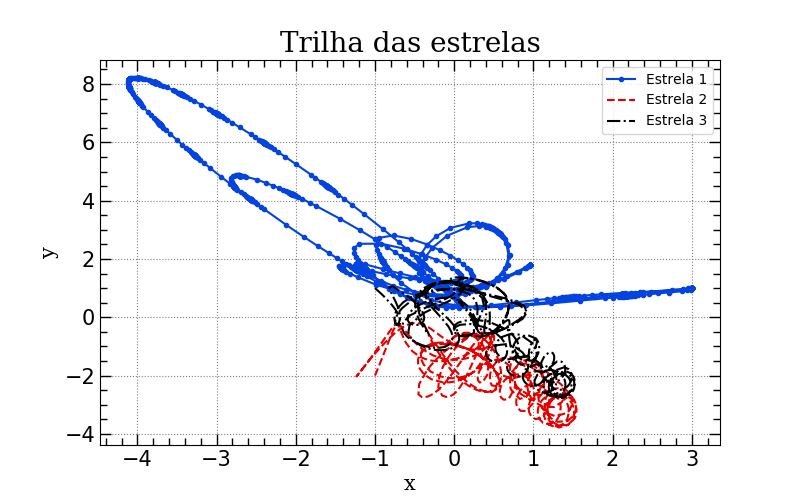

In [11]:
plt.figure(figsize=(8,5))

plt.plot(xpoints1, ypoints1, '.-', color='xkcd:blue', label='Estrela 1')
plt.plot(xpoints2, ypoints2, '--', color='xkcd:red', label='Estrela 2')
plt.plot(xpoints3, ypoints3, '-.', color='xkcd:black', label='Estrela 3')
plt.title(r'Trilha das estrelas', family='serif', fontsize=20)
plt.xlabel('x', family='serif', fontsize=15)
plt.ylabel('y', family='serif', fontsize=15)
plt.legend(loc='best')
opt_plot()

### Letra c)

Vamos agora simular um sistema composto por uma estrela de massa $m_{1}=10^{4}$ e dois planetas $m_{2}=200$ e $m_{3}=150$ cujas condições iniciais são diferentes das que foram usadas na **letra b)**.

Começamos definindo as constantes físicas, espaciais e temporais:

In [12]:
# Constantes físicas:
G = 1
m1 = 10000
m2 = 200
m3 = 150

# Constantes espaciais:
x1_0 = 0
x2_0 = -100
x3_0 = 150

y1_0 = 0
y2_0 = 0
y3_0 = 0

vx1_0 = 0
vx2_0 = 0
vx3_0 = 0

vy1_0 = 0
vy2_0 = -5
vy3_0 = 5

# Constantes temporais:
t_0 = 0
t_f = 100

Aqui copiamos e colamos a mesma função `time_step_planet()` porém introduzimos um erro bem menor. Aqui seguiremos uma recomendação do Mark Newman (autor do livro texto usado neste curso) de usar o método do passo adaptativo porém com um erro bem menor (usaremos $10^{-6}$) para este sistema planetário.

In [13]:
def time_step_planet(r, t, h):
    def runge_kutta_step(r, t, h):
        '''
        - param r: posições e velocidades atuais
        - param t: valor atual de t
        - param h: tamanho do passo
        
        - return: um vetor da mudança nas posições e velocidades para chegar a t + h
        '''
        k1 = h * f(r, t)
        k2 = h * f(r + 0.5 * k1, t + 0.5 * h)
        k3 = h * f(r + 0.5 * k2, t + 0.5 * h)
        k4 = h * f(r + k3, t + h)
        
        return (k1 + 2 * k2 + 2 * k3 + k4) / 6

    # Realizamos 2 etapas do RK com um passo de tamanho h:
    delta_step_1 = runge_kutta_step(r, t, h)
    delta_step_2 = runge_kutta_step(r + delta_step_1, t + h, h)
    delta_r1 = delta_step_1 + delta_step_2

    # Realizamos 1 etapa do RK com um passo de tamanho 2h:
    delta_r2 = runge_kutta_step(r, t, 2 * h)

    # Computamos as estimativas dos erros:
    
    # Erro para a estrela 1:
    delta_x1_m1 = delta_r1[0]
    delta_y1_m1 = delta_r1[2]
    delta_x2_m1 = delta_r2[0]
    delta_y2_m1 = delta_r2[2]
    error_m1 = np.sqrt((delta_x1_m1 - delta_x2_m1) ** 2 + (delta_y1_m1 - delta_y2_m1) ** 2) / 30

    # Erro para a estrela 2:
    delta_x1_m2 = delta_r1[4]
    delta_y1_m2 = delta_r1[6]
    delta_x2_m2 = delta_r2[4]
    delta_y2_m2 = delta_r2[6]
    error_m2 = np.sqrt((delta_x1_m2 - delta_x2_m2) ** 2 + (delta_y1_m2 - delta_y2_m2) ** 2) / 30

    # Erro para a estrela 3:
    delta_x1_m3 = delta_r1[8]
    delta_y1_m3 = delta_r1[10]
    delta_x2_m3 = delta_r2[8]
    delta_y2_m3 = delta_r2[10]
    error_m3 = np.sqrt((delta_x1_m3 - delta_x2_m3) ** 2 + (delta_y1_m3 - delta_y2_m3) ** 2) / 30

    # Usamos o maior valor entre os erros:
    error = max(error_m1, error_m2, error_m3)
    

    # Calculamos o rho:
    delta = 0.000001  # Erro por unidade de tempo (atualizado)
    rho = h * delta / error
    

    # Calcula o fator para multiplicar h por:
    factor = np.power(rho, 1 / 4)
    

    # Atualiza h de acordo
    # Se a precisão desejada for atingida, vá para a próxima etapa
    if  rho >= 1:
        # Atualiza t
        t = t + 2 * h

        # Evita que h fique muito grande
        if factor > 2:
            h *= 1.5
        else:
            h *= factor

        #  Use extrapolação local para melhorar nossa estimativa das posições
        delta_r1[0] += (delta_x1_m1 - delta_x2_m1) / 15
        delta_r1[2] += (delta_y1_m1 - delta_y2_m1) / 15
        delta_r1[4] += (delta_x1_m2 - delta_x2_m2) / 15
        delta_r1[6] += (delta_y1_m2 - delta_y2_m2) / 15
        delta_r1[8] += (delta_x1_m3 - delta_x2_m3) / 15
        delta_r1[10] += (delta_y1_m3 - delta_y2_m3) / 15
        
        return delta_r1, h, t
    
    # Se a precisão da meta não for atingida, deve-se refazer a etapa com h menor
    else:
        return time_step(r, t, factor * h)

Definimos novamente os arrays vazios:

In [14]:
h = (t_f - t_0) / 400000 

tpoints = []
xpoints1 = []
ypoints1 = []
xpoints2 = []
ypoints2 = []
xpoints3 = []
ypoints3 = []

r = np.array([x1_0, vx1_0, y1_0, vy1_0, x2_0, vx2_0, y2_0, vy2_0, x3_0, vx3_0, y3_0, vy3_0], float)  

Novamente, implementamos o laço mas com os novos valores:

In [15]:
t = t_0

while(t < t_f):
    tpoints.append(t)
    xpoints1.append(r[0])
    ypoints1.append(r[2])
    xpoints2.append(r[4])
    ypoints2.append(r[6])
    xpoints3.append(r[8])
    ypoints3.append(r[10])
    
    delta_r, h, t = time_step_planet(r, t, h)
    r += delta_r

Finalmente, vamos ao plot:

<IPython.core.display.Javascript object>


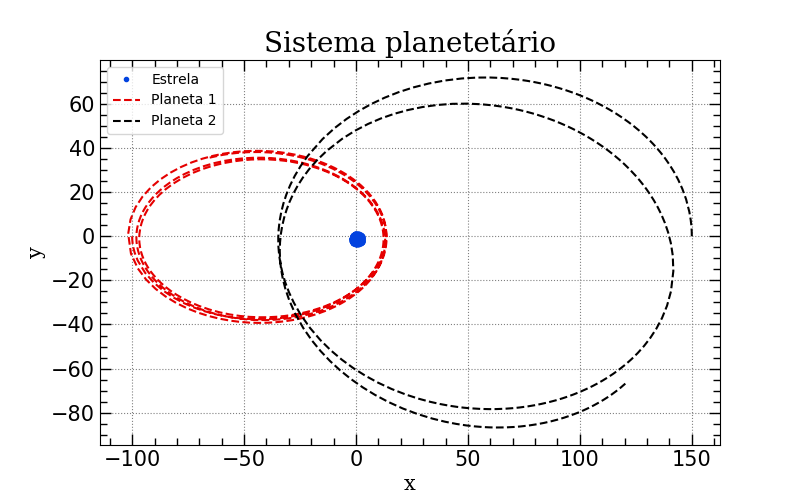

In [16]:
plt.figure(figsize=(8,5))

plt.plot(xpoints1, ypoints1, '.', color='xkcd:blue', label='Estrela')
plt.plot(xpoints2, ypoints2, '--', color='xkcd:red', label='Planeta 1')
plt.plot(xpoints3, ypoints3, '--', color='xkcd:black', label='Planeta 2')
plt.title(r'Sistema planetetário', family='serif', fontsize=20)
plt.xlabel('x', family='serif', fontsize=15)
plt.ylabel('y', family='serif', fontsize=15)
plt.legend(loc='best')
opt_plot()

Note que os planetas orbitam em torno de um centro mútuo (que é a estrela). O planeta 1 que possui maior massa orbita a estrela com uma orbita cuja excentricidade é maior que  excentricidade da orbita do planeta 2, que é o que possui menor massa.